# Лабораторная работа №2. Кластеризация данных

Считайте банковские данные из файла DATASET FOR CASE.csv в память в виде объекта Pandas.DataFrame (разделитель между колонками - табуляция, кодировка - ansi, для разделения целой и дробной частей чисел используется запятая). Выведите информацию о датасете, поймите и опишите его структуру. TARGET (take a credit) - целевая бинарная переменная, информирующая о выдаче / невыдаче кредита.

In [2]:
# Ваш код здесь
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import euclidean
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
import numpy as np
import pandas as pd
data = pd.read_csv("DATASET FOR CASE.csv", sep="\t", decimal=",", encoding="ansi")
data

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office,TARGET (take a credit)
0,0.0,397070.00,4.0,36.0,0.0,0.00,0.00,0.00,0,0.00,...,1.67,16600.00,12450.00,1.33,45.0,0.0,0.0,1.0,9823.13,0
1,0.0,254303.80,1.0,49.0,0.0,0.00,0.00,0.00,0,23460.00,...,0.00,0.00,0.00,2.33,64.0,0.0,0.0,0.0,437.01,0
2,1.0,71250.00,8.0,0.0,0.0,0.00,0.00,0.00,1,61200.00,...,26.67,55016.67,6877.08,1.33,32.0,0.0,0.0,1.0,1232.71,0
3,2.0,398150.43,1.0,47.0,0.0,0.00,0.00,0.00,0,102000.00,...,0.00,0.00,0.00,2.33,46.0,0.0,0.0,0.0,18012.86,0
4,0.0,90470.59,1.0,77.0,1.0,3890.00,0.19,83983.78,0,20400.00,...,0.00,0.00,0.00,1.67,43.0,0.0,0.0,0.0,8497.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48747,2.0,250000.00,5.0,29.0,2.0,5318.75,0.08,254054.25,0,70380.00,...,74.00,27200.00,2914.29,4.67,54.0,1.0,1.0,1.0,1094.14,0
48748,0.0,282169.41,6.0,5.0,1.0,10486.00,0.26,250908.58,0,40800.00,...,11.00,27166.67,4527.78,3.33,37.0,0.0,0.0,1.0,969.03,0
48749,4.0,150900.00,6.0,3.0,0.0,0.00,0.00,0.00,0,38808.96,...,72.00,35800.00,1032.69,7.00,45.0,0.0,0.0,1.0,1999.31,0
48750,6.0,66210.53,5.0,23.0,1.0,3086.00,0.08,14832.01,0,40800.00,...,4.67,15250.00,5718.75,2.00,62.0,0.0,0.0,1.0,1357.26,0


Представим, что значение переменной TARGET (take a credit) неизвестно. С помощью kmeans и метода локтя определите количество кластеров для датасета. 

In [3]:
# Ваш код здесь
data.drop('TARGET (take a credit)', axis=1, inplace=True)
data.ffill(inplace=True)

# После 8 незначительное увеличение

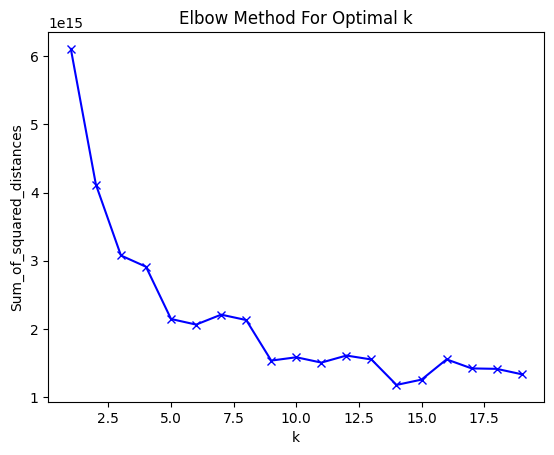

In [4]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = MiniBatchKMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Используя kmeans и выше определенное число кластеров k, получите метки классов, выведите их и добавьте их в исходный датасет, записав его под новым именем.

In [5]:
# Ваш код здесь
kmeans = KMeans(n_clusters=8)
labels = kmeans.fit_predict(data)
labels = pd.DataFrame(labels)
labels.columns = ['New Target']
result = pd.concat([data, labels], axis=1)
result

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office,New Target
0,0.0,397070.00,4.0,36.0,0.0,0.00,0.00,0.00,0,0.00,...,1.67,16600.00,12450.00,1.33,45.0,0.0,0.0,1.0,9823.13,1
1,0.0,254303.80,1.0,49.0,0.0,0.00,0.00,0.00,0,23460.00,...,0.00,0.00,0.00,2.33,64.0,0.0,0.0,0.0,437.01,0
2,1.0,71250.00,8.0,0.0,0.0,0.00,0.00,0.00,1,61200.00,...,26.67,55016.67,6877.08,1.33,32.0,0.0,0.0,1.0,1232.71,0
3,2.0,398150.43,1.0,47.0,0.0,0.00,0.00,0.00,0,102000.00,...,0.00,0.00,0.00,2.33,46.0,0.0,0.0,0.0,18012.86,1
4,0.0,90470.59,1.0,77.0,1.0,3890.00,0.19,83983.78,0,20400.00,...,0.00,0.00,0.00,1.67,43.0,0.0,0.0,0.0,8497.31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48747,2.0,250000.00,5.0,29.0,2.0,5318.75,0.08,254054.25,0,70380.00,...,74.00,27200.00,2914.29,4.67,54.0,1.0,1.0,1.0,1094.14,6
48748,0.0,282169.41,6.0,5.0,1.0,10486.00,0.26,250908.58,0,40800.00,...,11.00,27166.67,4527.78,3.33,37.0,0.0,0.0,1.0,969.03,6
48749,4.0,150900.00,6.0,3.0,0.0,0.00,0.00,0.00,0,38808.96,...,72.00,35800.00,1032.69,7.00,45.0,0.0,0.0,1.0,1999.31,0
48750,6.0,66210.53,5.0,23.0,1.0,3086.00,0.08,14832.01,0,40800.00,...,4.67,15250.00,5718.75,2.00,62.0,0.0,0.0,1.0,1357.26,0


Примените для решения той же задачи агломеративную, аффинную и спектральную кластеризации: инструменты AgglomerativeClustering, AffinityPropagation, SpectralClustering из sklearn.cluster, и, используя метрики качества кластеризации, прокомментируйте достигнутые результаты.

In [7]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

df_cut = pd.read_csv('DATASET FOR CASE.csv', sep='\t', encoding='ansi', decimal=',').head(10000)

X = df_cut.drop('TARGET (take a credit)', axis=1)
y = result.head(10000)['New Target']

algorithms = []
algorithms.append(KMeans(n_clusters=k, random_state=1))
algorithms.append(AffinityPropagation(damping=0.9, max_iter=1000))
algorithms.append(SpectralClustering(n_clusters=12, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=k))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means', 'Affinity',
                              'Spectral', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.249080,0.494359,0.824644,0.354128,0.495481,0.316084
Affinity,0.023447,0.301481,0.931255,0.186436,0.310675,0.194340
Spectral,0.202913,0.454032,0.740395,0.328303,0.454898,0.203990
Agglomerative,0.352909,0.513906,0.818408,0.375724,0.515011,0.284215


<font color="middleblue">Алгомеративная кластеризация</font>

In [ ]:
# Ваш код здесь
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('DATASET FOR CASE.csv', sep='\t', encoding='ansi', decimal=',')
df_cut = df[0:5000]
X = df_cut.drop('TARGET (take a credit)', axis=1)
y = result["New Target"].head(5000)

# Стандартизация
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
std[std==0] = 1 # Избегаем деления на ноль
X_scaled = (X-mean) / std

data = []
algo_clus = AgglomerativeClustering(7)
algo_clus.fit_predict(X_scaled)
data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo_clus.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo_clus.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo_clus.labels_),
        'Completeness': metrics.completeness_score(y, algo_clus.labels_),
        'V-measure': metrics.v_measure_score(y, algo_clus.labels_),
        'Silhouette': metrics.silhouette_score(X, algo_clus.labels_)}))
for key, value in data[0].items():
    print(key, value)


ARI 0.13889365909988236
AMI 0.14027081269594974
Homogenity 0.17351133581332678
Completeness 0.11894103468700565
V-measure 0.14113489848794455
Silhouette -0.26352198376524827


<font color="middleblue">AffinityPropagation</font>

Число кластеров: 36


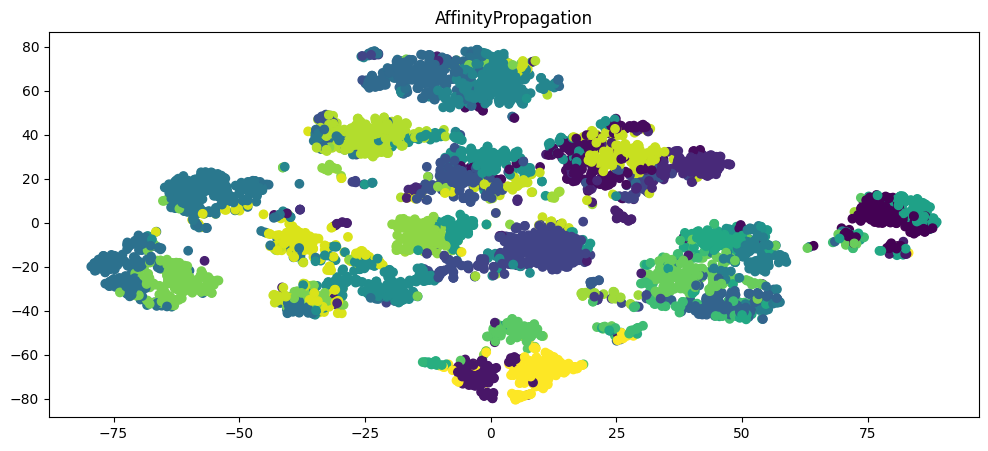

[{'ARI': -4.171203326670085e-05,
  'AMI': -0.0007125753377741836,
  'Homogenity': 0.015475104389683495,
  'Completeness': 0.0063518404321710195,
  'V-measure': 0.009006793626567406,
  'Silhouette': -0.2084723238498674}]

In [ ]:
from sklearn.cluster import AffinityPropagation, SpectralClustering
from sklearn.manifold import TSNE

df = pd.read_csv('DATASET FOR CASE.csv', sep='\t', encoding='ansi', decimal=',')
df_sample = df[0:5000]
X = df_sample.drop(columns=['TARGET (take a credit)']).to_numpy()
y = result["New Target"].head(5000)

# Берём только числовые признаки
X = df_sample.select_dtypes(include=np.number)

# Стандартизация
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
std[std == 0] = 1
X_scaled = (X - mean) / std

af = AffinityPropagation(preference=-500, damping=0.95, max_iter=1000, convergence_iter=50, random_state=42)
clusters_af = af.fit_predict(X_scaled)
n_clusters_af = len(np.unique(clusters_af))
print(f"Число кластеров: {n_clusters_af}")
# print("Распределение по кластерам:")
# print(pd.Series(clusters_af).value_counts())

# Визуализация (PCA для снижения до 2D)
from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_af, cmap='viridis')
plt.title('AffinityPropagation')
plt.show()

data = []
af_metrics = af.fit(X_scaled)
data.append(({
        'ARI': metrics.adjusted_rand_score(y, af_metrics.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, af_metrics.labels_),
        'Homogenity': metrics.homogeneity_score(y, af_metrics.labels_),
        'Completeness': metrics.completeness_score(y, af_metrics.labels_),
        'V-measure': metrics.v_measure_score(y, af_metrics.labels_),
        'Silhouette': metrics.silhouette_score(X, af_metrics.labels_)}))
for key, value in data[0].items():
    print(key, value)




<font color="middleblue">SpectralClustering</font>

Число кластеров: 2
ARI 0.00026659624106086416
AMI 0.00027115264748542566
Homogenity 0.0003358184580296848
Completeness 0.2379115644500466
V-measure 0.0006706902190977753
Silhouette 0.9187079615501054


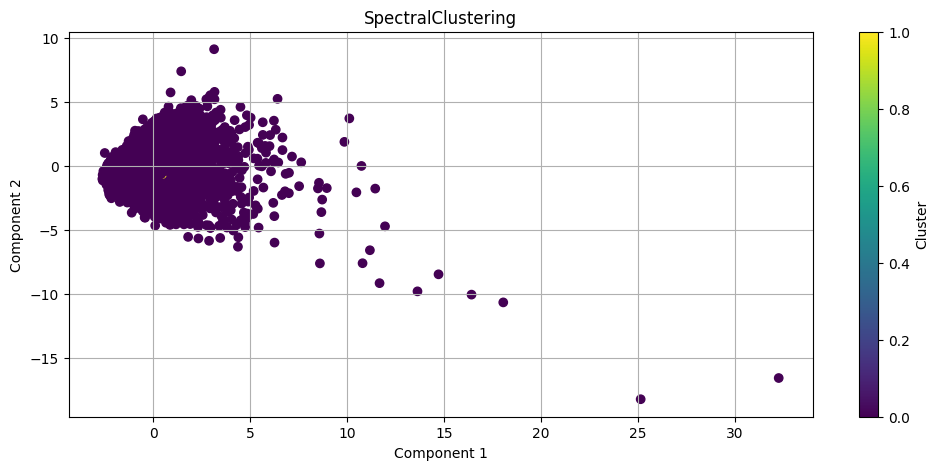


Невозможно вычислить Silhouette Score: осталось менее 2 кластеров после фильтрации.


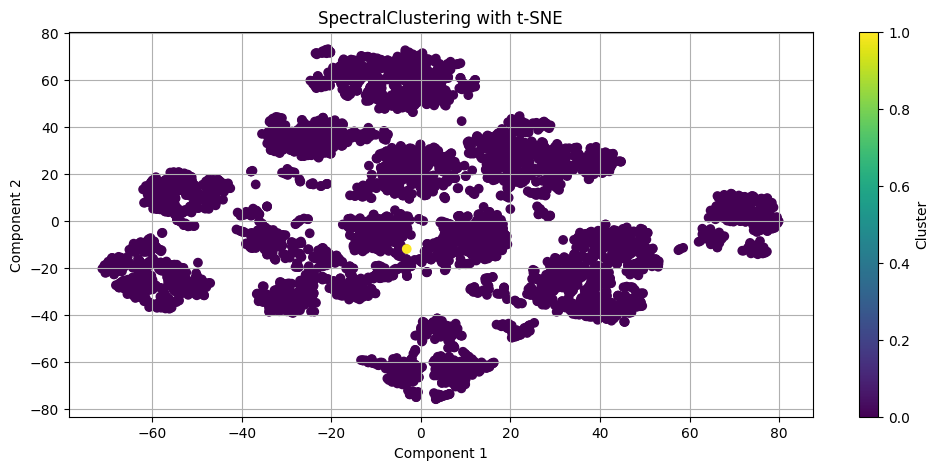

In [16]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import silhouette_score

# Вычисление матрицы близости с RBF-ядром
affinity_matrix = rbf_kernel(X_scaled, gamma=0.1)  # gamma можно настроить (например, 0.01 или 1)

# Применение Spectral Clustering
sc = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42, n_init=100, n_jobs=-1)
clusters_sc = sc.fit_predict(affinity_matrix)

# Вычисление Silhouette Score
silhouette_sc = silhouette_score(X_scaled, clusters_sc)

data = []
# Вывод результатов
print(f"Число кластеров: 2")
data.append(({
        'ARI': metrics.adjusted_rand_score(y, sc.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, sc.labels_),
        'Homogenity': metrics.homogeneity_score(y, sc.labels_),
        'Completeness': metrics.completeness_score(y, sc.labels_),
        'V-measure': metrics.v_measure_score(y, sc.labels_),
        'Silhouette': silhouette_score(X, sc.labels_)}))
for key, value in data[0].items():
    print(key, value)

# Снижение размерности для визуализации с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация
plt.figure(figsize=(12, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_sc, cmap='viridis')
plt.title('SpectralClustering')
plt.colorbar(label='Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

# Фильтрация одиночных точек и повторный расчёт Silhouette Score
cluster_counts = pd.Series(clusters_sc).value_counts()
valid_clusters_mask = np.isin(clusters_sc, cluster_counts[cluster_counts > 1].index)
X_scaled_filtered = X_scaled[valid_clusters_mask]
clusters_sc_filtered = clusters_sc[valid_clusters_mask]

# Проверка количества уникальных кластеров
unique_clusters = np.unique(clusters_sc_filtered)
if len(unique_clusters) < 2:
    print("\nНевозможно вычислить Silhouette Score: осталось менее 2 кластеров после фильтрации.")
else:
    silhouette_sc_filtered = silhouette_score(X_scaled_filtered, clusters_sc_filtered)
    print(f"\nSilhouette Score (без одиночных точек): {silhouette_sc_filtered:.3f}")
    print("Распределение по кластерам (без одиночных точек):")
    print(pd.Series(clusters_sc_filtered).value_counts())

# Визуализация с t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(12, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_sc, cmap='viridis')
plt.title('SpectralClustering with t-SNE')
plt.colorbar(label='Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

<font color="middleblue">ARI</font>
У всех этот показатель очень низкий либо отрицательный, что говорит о независымых и случайных разбиениях.
<font color="middleblue">AMI</font>
Также близок к 0, разбиения независимые
<font color="middleblue">Гомогенность</font>
Близки к 0, что говорит о низкой однородности данных в кластерах и датасете, наиболее высокий показатель у алгомеративной кластеризации
<font color="middleblue">Полнота</font>
Близки к 0, но значительно больше остальных показателей, наиболее высокий показатель у спектральной кластеризации
<font color="middleblue">V-мера</font>
Также близки к 0, но также значительно больше остальных показателей, кроме спектральной, наиболее высокий у алгомеративной
<font color="middleblue">Силуэт</font>
Высокий и близкий к 1 только у спектральной, у остальных отрицательный, что говорит о четкой и плотной кластеризации

<font color="middleblue">Вывод</font>
Данные методы не подходят для данного дата сета, так как данные там не однородные и разделяются на большое количество групп